AP40012 Project
Group 1

(Some rough idea, please also try something you want to try)


1. ascertain why linear model works (
Possibilities:
try to predict in a longer time (Kyle)

)
2. tidy up the code   (Anyone who wants)
3. try to clean/normalize the data（generalized using，by country, annotation etc）  (William)
4. find out why ANN method doesn't work  (Michael) 
5. try to apply other models(like SGD, Lasso regression) (Gauthum)
6. try to combine with the SEIR  (Caron)

In [2]:
# used packages in the project
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
#%matplotlib inline
import matplotlib
import tensorflow as tf;tf.compat.v1.disable_eager_execution()
from numpy.random import RandomState
import time
from sklearn.utils import shuffle
import seaborn as sns

In [4]:
covid_raw = pd.read_csv('covid_19_data.csv')
covid_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              236017 non-null  int64  
 1   ObservationDate  236017 non-null  object 
 2   Province/State   173972 non-null  object 
 3   Country/Region   236017 non-null  object 
 4   Last Update      236017 non-null  object 
 5   Confirmed        236017 non-null  float64
 6   Deaths           236017 non-null  float64
 7   Recovered        236017 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 14.4+ MB


In [5]:
region_name = "Hong Kong"
covid = covid_raw.loc[covid_raw['Province/State'] == region_name]

covid_train = covid[:300]
covid_test = covid[301:]
covid_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 12 to 157140
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              300 non-null    int64  
 1   ObservationDate  300 non-null    object 
 2   Province/State   300 non-null    object 
 3   Country/Region   300 non-null    object 
 4   Last Update      300 non-null    object 
 5   Confirmed        300 non-null    float64
 6   Deaths           300 non-null    float64
 7   Recovered        300 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ KB


In [6]:
col_n = ['Confirmed','Deaths','Recovered']
HK = pd.DataFrame(covid_train,columns = col_n)
HK_test = pd.DataFrame(covid_test,columns = col_n)
HK.info()
HK.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 12 to 157140
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  300 non-null    float64
 1   Deaths     300 non-null    float64
 2   Recovered  300 non-null    float64
dtypes: float64(3)
memory usage: 9.4 KB


,Confirmed,Deaths,Recovered
12,0.0,0.0,0.0
50,2.0,0.0,0.0
109,2.0,0.0,0.0
149,5.0,0.0,0.0
192,8.0,0.0,0.0


In [13]:
def generateCsv(df, file_name, move_forward = 0): # generate csv file
    # use the data of day x as dependent variables(Y-vairables)
    # data of day (x-moveForward) to day (x-1) will be the X-vairables
    tempArray = np.array(df)
    start_day_index = move_forward
    with open(file_name+'.csv','w') as output:
        write_c = lambda x: output.write(str(x)+',')
        write_n = lambda x: output.write(str(x)+'\n')
        Range = lambda x: range(x+1)
        def new_label(label, day):
            if (day == move_forward):
                return label
            else:
                return label+'_'+str(move_forward-day)+'_day(s)_ago'
        # first line
        for _ in Range(move_forward):
            write_c(new_label('Infected',_))
            write_c(new_label('Confirmed',_))
            write_c(new_label('Deaths',_))
            if ( _ == move_forward):
                write_n(new_label('Recovered',_))
            else:
                write_c(new_label('Recovered',_))
        # data
        for index in range(start_day_index,len(tempArray)):
            for _ in Range(move_forward):
                write_c(tempArray[index-move_forward+_][0]-tempArray[index-move_forward+_][1]-tempArray[index-move_forward+_][2])
                write_c(tempArray[index-move_forward+_][0])
                write_c(tempArray[index-move_forward+_][1])
                if ( _ == move_forward):
                    write_n(tempArray[index-move_forward+_][2])
                else:
                    write_c(tempArray[index-move_forward+_][2]) 

In [8]:
generateCsv(HK,'HK_new',5)
generateCsv(HK_test,'HK_new_test',5)

In [39]:
df = pd.read_csv('HK_new.csv')
df_test = pd.read_csv('HK_new_test.csv')
df_test.shape

(97, 24)

In [10]:
infectant_df = pd.DataFrame( df ,columns = ['Infected'])
confirm_df = pd.DataFrame( df ,columns = ['Confirmed'])
death_df = pd.DataFrame( df ,columns = ['Deaths'])
recover_df = pd.DataFrame( df ,columns = ['Recovered'])
infectant_df_test = pd.DataFrame( df_test ,columns = ['Infected'])

infectant_ar = np.c_[infectant_df]
confirm_ar = np.c_[confirm_df]
death_ar = np.c_[death_df]
recover_ar = np.c_[recover_df]
infectant_ar_test = np.c_[infectant_df_test]

days = np.array(range(1,np.size(confirm_ar)+1))
days_test = np.array(range(1,np.size(infectant_ar_test)+1))

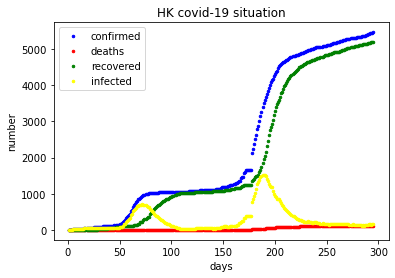

In [11]:
plt.plot(days,confirm_ar,marker='.',lw=0,c='blue',ms=5,label='confirmed')
plt.plot(days,death_ar,marker='.',lw=0,c='red',ms=5,label='deaths')
plt.plot(days,recover_ar,marker='.',lw=0,c='green',ms=5,label='recovered')
plt.plot(days,infectant_ar,marker='.',lw=0,c='yellow',ms=5,label='infected')
plt.title("HK covid-19 situation")
plt.xlabel('days')
plt.ylabel('number')
plt.legend()
plt.show()

In [12]:
X = np.array(df.iloc[:,list(range(4*5))])
X_test = np.array(df_test.iloc[:,list(range(4*5))])
print(X.shape)

(295, 20)


In [11]:
model = LinearRegression()
model.fit(X,infectant_ar)

LinearRegression()

In [12]:
print(model.coef_)

[[ 0.12833478 -0.20978603 -0.52430914  0.18618833 -0.24341677  0.15647075
   0.30335507  0.09653245 -0.40824369  0.37494673  1.56814966 -0.78495924
  -0.41169425  0.35722432  0.84214367 -0.07322509  1.74351596 -0.48584067
  -2.61697533  0.3876187 ]]


In [13]:
y_predict = model.predict(X_test)

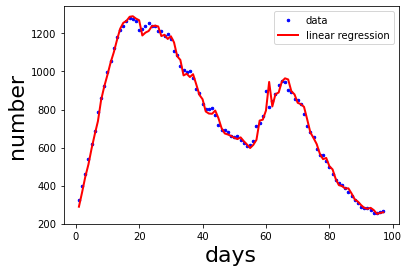

In [14]:
plt.plot(days_test,infectant_ar_test,marker='.',lw=0,c='b',ms=5,label='data')
plt.plot(days_test,y_predict,marker='o',ms=0,lw=2,color='r',label='linear regression')
plt.xlabel('days',fontsize=22)
plt.ylabel('number',fontsize=22)
plt.legend()
plt.show()

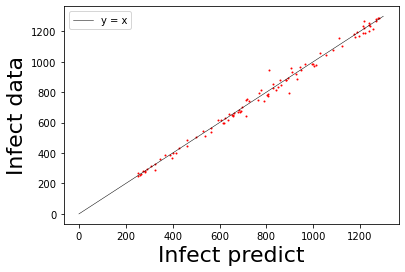

In [15]:
plt.plot(infectant_ar_test,y_predict,marker='.',color='r',lw=0.0,ms=2.0)
plt.plot(range(1300),range(1300),color='k',lw=0.5,label='y = x')
plt.xlabel('Infect predict',fontsize=22)
plt.ylabel('Infect data',fontsize=22)
plt.legend()
plt.show()

In [41]:
def r2(y,Y):
  m = len(y)
  mu = np.mean(y)
  ss_res = 0
  ss_tot = 0
  for i in range(m):
    ss_res += (y[i]-Y[i])**2
    ss_tot += (y[i]-mu)**2
  return 1-ss_res/ss_tot
print((r2(infectant_ar_test,y_predict)))

NameError: name 'infectant_ar_test' is not defined

331.98657
211.90819
190.47977
178.28574
169.58926
161.9551
154.10329
147.15407
142.13332
137.06036


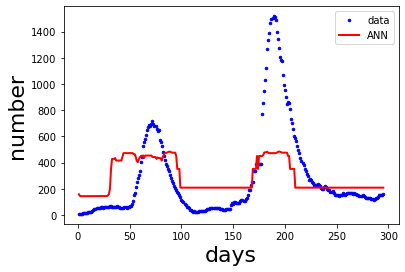

In [59]:
# a simple attempt of artificial neurual network

# input data preparation
x_data = X
y_data = infectant_ar
x_test = X_test
y_test = infectant_ar_test

# basic structure of network
activation_function = tf.keras.activations.sigmoid
#activation_function = lambda x: x

w1 = tf.Variable(tf.random.normal([20, 100]))
b1 = tf.Variable(tf.zeros([1, 100]) + 1)
w2 = tf.Variable(tf.random.normal([100, 100]))
b2 = tf.Variable(tf.zeros([1, 100]) + 1)
w3 = tf.Variable(tf.random.normal([100, 1]))
b3 = tf.Variable(tf.zeros([1, 1]) + 1)

x = tf.compat.v1.placeholder(tf.float32, [None, 20])
y = tf.compat.v1.placeholder(tf.float32, [None, 1])

a1 = x
a2 = activation_function(tf.matmul(a1,w1)+b1)
a3 = activation_function(tf.matmul(a2,w2)+b2)
prediction = tf.matmul(a3,w3)+b3
#prediction = tf.matmul(a1,w1)+b1

cost = tf.compat.v1.reduce_mean(tf.reduce_sum(tf.square(y-prediction),axis=[1]))/(2*x_data.shape[0])
train_step = tf.compat.v1.train.GradientDescentOptimizer(0.01).minimize(cost)

with tf.compat.v1.Session() as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    STEPS = 5000
    for i in range(STEPS):
        sess.run(train_step, feed_dict={x: x_data, y: y_data})
        if i % 500 == 0:
            print(sess.run(cost, feed_dict={x: x_data, y: y_data}))
    y_predict = sess.run(prediction, feed_dict={x: x_data}) #THIS IS train set!
plt.plot(days,infectant_ar,marker='.',lw=0,c='b',ms=5,label='data')
plt.plot(days,y_predict,marker='o',ms=0,lw=2,color='r',label='ANN')
plt.xlabel('days',fontsize=22)
plt.ylabel('number',fontsize=22)
plt.legend()
plt.show()

<ipython-input-18-0fef2337ad06>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,infectant_ar)


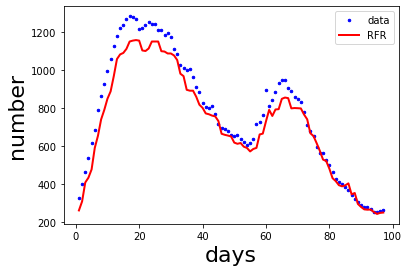

In [18]:
# a simple attempt of random forest
model = RandomForestRegressor()
model.fit(X,infectant_ar)
y_predict = model.predict(X_test)
plt.plot(days_test,infectant_ar_test,marker='.',lw=0,c='b',ms=5,label='data')
plt.plot(days_test,y_predict,marker='o',ms=0,lw=2,color='r',label='RFR')
plt.xlabel('days',fontsize=22)
plt.ylabel('number',fontsize=22)
plt.legend()
plt.show()

**The combination of machine learning and epidemiologic compartment models**
## a brief introduction
Compartment models are mathematical models which uses differential equations and a set of parameters to describe an infectious diseases.The simplest one of them is SIR(susceptible, infectious and recovered) model. Its mathematical expression is:
\begin{equation}
\begin{split}
&\frac{dS}{dt}=-\frac{\beta I S}{N}\\
&\frac{dI}{dt}=\frac{\beta I S}{N}-\gamma I\\
&\frac{dR}{dt}=\gamma I\\
\end{split}
\end{equation}
where $S$ is the stock of susceptible population, $I$ is the stock of infected, $R$ is the stock of removed population. $N$ is the total population in the area. Note that:
\begin{equation}
\frac{dS}{dt}+\frac{dI}{dt}+\frac{dR}{dt}=0
\end{equation}
Thus, $N=S+I+R$ is a constant,which means the model assume that the birth and death(or population move in and move out) do not matter the epidemic much.
Parameters $\beta$ and $\gamma$ are adopted to model the infectious ability and the rate at which a population transitions from an infected state to a state unable to infect others (including both recovery and death).
However, to apply the model to Covid-19 case in a certain area, we may see the $N$ in another way. In original SIR model, a basic assumption is that every infectant contacts other susceptible people in the area with a equal probability. However, this is not quite real when the area is large( a city or a state)due to the fact that most people only have connection with limited people in their daily life. Therefore, to follow the assumption of model as far as possible, we can regard the total area is a community that is included in the city/state. With the evolution of epidemic, the total area will expand. This means that the total population $N$ in the model should not be a variable rather than a constant. To catch this feature, we adjust the model as following:
\begin{equation}
\begin{split}
&\frac{dS}{dt}=-\frac{\beta I S}{N}+ \Lambda [I(t),R(t),t] \\
&\frac{dI}{dt}=\frac{\beta I S}{N}-\gamma I\\
&\frac{dR}{dt}=\gamma I\\
\end{split}
\end{equation}
where $\Lambda$ is a functional accounting for the increase of total population in the epidemic community:
\begin{equation}
\frac{dN}{dt}=\frac{dS}{dt}+\frac{dI}{dt}+\frac{dR}{dt}=\Lambda
\end{equation}
Because we do not have a good preset form for $\Lambda$, letting the machine learning method learn it is a very convenient way to accomplish the model. In practice, we can get real data related to $I$ and $R$ but not $S$, so we can directly let $S$ be the functional learnt by algorithm.

2963.1377
2086.8538
1658.9034
1449.8202
1347.768
1297.8762
1273.638
1261.7501
1255.7162
1253.0885


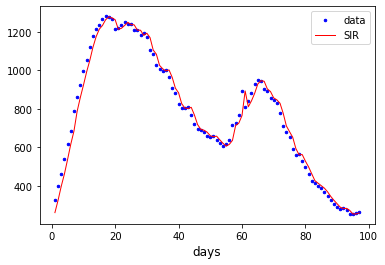

(1670.2802, 1.0448395, 0.9499414)


In [19]:
def SIR_predictor(x_train,y_train,x_test,y_test,steps=50000,learning_rate=1e-10,show_step=5000):
    """
    predictor based on SIR model
    """
    shape_train = x_train.shape; shape_test = x_test.shape
    shape_train_y = y_train.shape; shape_test_y = y_test.shape
    if(shape_train[1]!=shape_test[1]):
        raise SizeError("The train set should have a same number of variable with test set!")
    if(shape_train_y[0]!=shape_train[0] or shape_test_y[0]!=shape_test[0]):
        raise SizeError("The input sizes of X and Y variable are different!")
    train_input_size = shape_train[0];test_input_size = shape_test[0]
    num_of_variables = shape_train[1]

    beta = tf.Variable(1.)
    gamma = tf.Variable(1.)
    S_coef = tf.Variable(tf.ones([num_of_variables, 1]))

    x = tf.compat.v1.placeholder(tf.float32, shape=[None, 20])
    y = tf.compat.v1.placeholder(tf.float32, shape=[None, 1])
    m = tf.compat.v1.placeholder(tf.int32 ,shape=None)
        
    I = tf.reshape(x[:,-4],[m,1])
    I_plus_R = tf.reshape(x[:,-3],[m,1])
    R = tf.reshape(tf.add(x[:,-2],x[:,-1]),[m,1])
    S = tf.matmul(x,S_coef)
    I_next = (beta*I*S)/(I_plus_R+S)-(gamma-1)*I
    R_next = gamma*I+R
    
    loss = tf.compat.v1.reduce_mean(tf.reduce_sum(tf.square(y-I_next),axis=[1]))
    train_step = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    with tf.compat.v1.Session() as sess:
        init = tf.compat.v1.global_variables_initializer()
        sess.run(init)
        for i in range(steps):
            sess.run(train_step, feed_dict={x: x_data, y: y_data, m: train_input_size})
            if i % show_step == 0:
                print(sess.run(loss, feed_dict={x: x_data, y: y_data, m: train_input_size}))
        y_predict = sess.run(I_next, feed_dict={x: x_test, m: test_input_size})
        LOSS = sess.run(loss, feed_dict={x: x_test, y: y_test, m: test_input_size})
        BETA = sess.run(beta)
        GAMMA = sess.run(gamma)
    plt.plot(days_test,y_test,marker='.',lw=0,c='b',ms=5,label='data')
    plt.plot(days_test,y_predict,marker='o',lw=1,ms=0,color='r',label='SIR')
    plt.xlabel('days',fontsize=12)
    plt.legend()
    plt.show()
    return (LOSS, BETA, GAMMA)

temp = SIR_predictor(X,infectant_ar,X_test,infectant_ar_test)
print(temp)

In [20]:
class Network(object):

    def __init__(self, sizes, reg='l1'):
        prng = RandomState(33) # seed for random numbers
        self.num_layers = len(sizes)        
        self.sizes = sizes
        self.reg = reg # variable for regularization technique
        self.biases = [prng.randn(y, 1) for y in sizes[1:]]
        self.weights = [prng.randn(y, x)/np.sqrt(x) for x, y in zip(sizes[:-1], sizes[1:])]
                
    def feedforward(self, a):  
        a_list = [a]
        z_list = []
        for b, w in zip(self.biases[:-1], self.weights[:-1]):
            z = np.dot(w, a)+b
            z_list.append(z)
            a = tanh(z)
            a_list.append(a)
        z = np.dot(self.weights[-1], a)+self.biases[-1]
        z_list.append(z)
        a_list.append(z)
        return a_list,z_list

    def SGD(self, X, y, X_test, y_test, hyper_params):
        # We get the hyper-parameters
        epochs, mini_batch_size, alpha, lmbda = hyper_params
        rmse, y_pred = self.evaluate(X,y)
        rmse_test, y_pred_test = self.evaluate(X_test,y_test)
        print("Epoch {:3d} complete Train {:.4f} eV Test {:.4f} eV".format(0,rmse,rmse_test))
        m,n = X.shape
        rmse_list, rmse_test_list = [],[]
        # Loop over epochs
        for j in range(epochs):
            t0 = time.time()
            total_batch = int(m/mini_batch_size)
            # Loop over batches
            for k in range(total_batch):
                offset = k*mini_batch_size
                Xi = X[offset:offset+mini_batch_size]
                Yi = y[offset:offset+mini_batch_size]
                # Update weights and biases
                self.update_mini_batch(Xi,Yi,alpha,lmbda,m)
            if (j+1) % 1 == 0:
                rmse, y_pred = self.evaluate(X,y)
                rmse_list.append(rmse)
                t = time.time()
                rmse_test, y_pred_test = self.evaluate(X_test,y_test)
                rmse_test_list.append(rmse_test)
                print("Epoch {:3d} complete Train {:.4f} Test {:.4f} @{:.3f}s".format(j+1,rmse,rmse_test,t-t0))
            else: 
                t = time.time()
                print("Epoch {:3d} complete @{:.3f}s".format(j+1,t-t0))
        return rmse_list, rmse_test_list, y_pred, y_pred_test

    def update_mini_batch(self, Xi, Yi, alpha, lmbda, m):
        # Create arrays filled with zeros
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        mi,ni = Xi.shape
        # Loop over examples in the mini batch
        for i in range(mi):
            # Backprop
            delta_nabla_b, delta_nabla_w = self.backprop(np.c_[Xi[i]], Yi[i])
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        # Update weights and biases via GD based on all examples in the mini batch
        if self.reg == 'l1':
            self.weights = [w-alpha*(lmbda/m)*np.sign(w)-(alpha/mi)*nw for w, nw in zip(self.weights, nabla_w)]
            
        if self.reg == 'l2':
            ### Q.1. BEGIN YOUR CODE
            self.weights = [(1-alpha*(lmbda/m))*w-alpha*nw for w, nw in zip(self.weights, nabla_w)]
            ### Q.1. END YOUR CODE
        else:
            self.weights = [w-(alpha/mi)*nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(alpha/mi)*nb for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, xi, yi):
        # Initialize arrays
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # Forward path
        a_list,z_list = self.feedforward(xi)
        delta = self.J_prime(a_list[-1], yi) # BP1
        nabla_b[-1] = delta # BP3
        nabla_w[-1] = np.dot(delta, a_list[-2].transpose()) # BP4
        # Backpropagate
        for l in range(2, self.num_layers):
            z = z_list[-l]
            sp = tanh_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            # Compute dJ/db of each layer (BP3)
            nabla_b[-l] = delta
            # Compute dJ/dw of each layer (BP4)
            nabla_w[-l] = np.dot(delta, a_list[-l-1].transpose())
        return nabla_b, nabla_w
    
    def evaluate(self, X_val, y_val):
        # Feedforward and compute RMSE
        m_val,n_val = X_val.shape
        a_list,z_list = self.feedforward(np.c_[X_val].T)
        rmse = np.sqrt(np.sum((a_list[-1]-np.c_[y_val].T)**2)/m_val)
        # Returns RMSE value and list of output values over arguments data X_val/y_val
        return rmse,a_list[-1]
    
    def J_prime(self, hi, y):
        return hi-y

# Some activation functions and their respective derivatives
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def tanh(z):
    return 2*sigmoid(2*z)-1

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

def tanh_prime(z):
    return 1-tanh(z)**2

In [107]:
### BEGIN YOUR CODE
alphas = [0.01,0.001,0.0001,0.00001]
epochs, mini_batch_size, lmbda = 40, 40, 0.01
### END YOUR CODE

err, err_val  = [],[]
for alpha in alphas:
    print('>>> Alpha =',alpha)
    net = Network([X.shape[1],500,500,1],'l1')
    hyper_params = epochs, mini_batch_size, alpha,lmbda
    rmse_list,rmse_list_test,y_predict, y_predict_test = net.SGD(X,infectant_ar,X_test,infectant_ar_test,hyper_params) 
    err.append(rmse_list)
    err_val.append(rmse_list_test)

>>> Alpha = 0.01
Epoch   0 complete Train 444.2072 eV Test 839.2840 eV


<ipython-input-20-7eb4af939538>:111: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Epoch   1 complete Train 31268445.8515 Test 31170758.4821 @0.300s
Epoch   2 complete Train 25891551477661.8203 Test 25891551478158.7969 @0.211s
Epoch   3 complete Train 124804892898517794816.0000 Test 124804892898517778432.0000 @0.244s
Epoch   4 complete Train 601596289238100577699758080.0000 Test 601596289238100646419234816.0000 @0.224s
Epoch   5 complete Train 2899871045274959105569086098112512.0000 Test 2899871045274959105569086098112512.0000 @0.240s
Epoch   6 complete Train 13978231298391349682934637846593284341760.0000 Test 13978231298391349682934637846593284341760.0000 @0.222s
Epoch   7 complete Train 67379185895074909914767569843030165209034522624.0000 Test 67379185895074909914767569843030165209034522624.0000 @0.223s
Epoch   8 complete Train 324787492420842985964033017676635792409687310171373568.0000 Test 324787492420842985964033017676635792409687310171373568.0000 @0.207s
Epoch   9 complete Train 1565571234376246156598555996043571194751579535906735185199104.0000 Test 15655712343

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-20-7eb4af939538>:91: RuntimeWarning: invalid value encountered in multiply
  delta = np.dot(self.weights[-l+1].transpose(), delta) * sp


Epoch  23 complete Train inf Test inf @0.236s
Epoch  24 complete Train nan Test nan @0.232s
Epoch  25 complete Train nan Test nan @0.219s
Epoch  26 complete Train nan Test nan @0.217s
Epoch  27 complete Train nan Test nan @0.227s
Epoch  28 complete Train nan Test nan @0.224s
Epoch  29 complete Train nan Test nan @0.248s
Epoch  30 complete Train nan Test nan @0.258s


KeyboardInterrupt: 

>>> Alpha= 0.001  10-RMSE= nan nan eV
>>> Alpha= 0.0001  10-RMSE= 357.7050417961217 537.868770516324 eV
>>> Alpha= 1e-05  10-RMSE= 342.9420458516923 556.4319394543683 eV


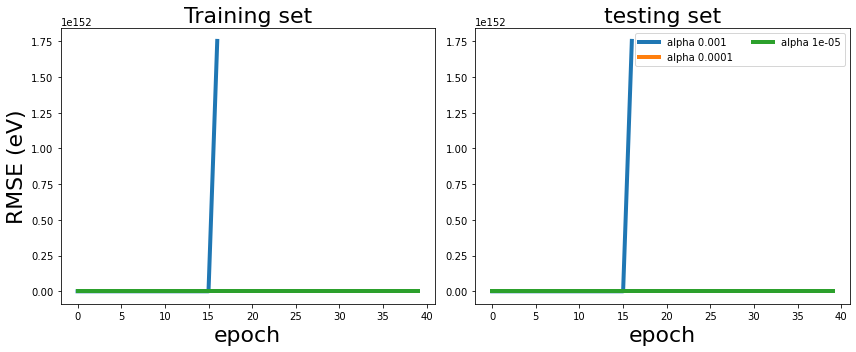

In [104]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
for i in range(len(err)):
    ax1.plot(err[i],marker = '.',ms=0,ls='-',lw=4,label='alpha '+str(alphas[i]))
    ax2.plot(err_val[i],marker = '.',ms=0,ls='-',lw=4,label='alpha '+str(alphas[i]))
    print('>>> Alpha=',alphas[i],' 10-RMSE=',np.mean(err[i][-10:]),np.mean(err_val[i][-10:]),'eV')

#ax1.set_ylim(1,10)
#ax2.set_ylim(4,10)
ax1.set_xlabel('epoch',fontsize=22)
ax2.set_xlabel('epoch',fontsize=22)
ax1.set_ylabel('RMSE (eV)',fontsize=22)
ax1.set_title('Training set',fontsize=22)
ax2.set_title('testing set',fontsize=22)
plt.legend(ncol=2)
plt.tight_layout()
#plt.savefig('figure.pdf')
plt.show()

In [118]:
alpha, lmbda =1e-5,0.01
epochs, mini_batch_size = 100, 40
net = Network([X.shape[1],2000,2000,1])
hyper_params = epochs, mini_batch_size, alpha,lmbda
rmse_list,rmse_list_test,y_predict,y_predict_test = net.SGD(X,infectant_ar,X_test,infectant_ar_test,hyper_params) 

<ipython-input-20-7eb4af939538>:111: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Epoch   0 complete Train 442.8703 eV Test 836.9791 eV
Epoch   1 complete Train 411.3758 Test 787.8677 @6.806s
Epoch   2 complete Train 385.6847 Test 742.5953 @6.746s
Epoch   3 complete Train 366.7255 Test 702.6957 @6.483s
Epoch   4 complete Train 354.5968 Test 670.7366 @6.519s
Epoch   5 complete Train 347.2873 Test 646.2947 @6.846s
Epoch   6 complete Train 342.8183 Test 628.2014 @7.191s
Epoch   7 complete Train 339.7795 Test 615.1189 @7.108s
Epoch   8 complete Train 337.2900 Test 605.8354 @6.886s
Epoch   9 complete Train 334.7184 Test 600.3052 @6.590s
Epoch  10 complete Train 332.2128 Test 596.7104 @6.752s
Epoch  11 complete Train 329.0830 Test 596.3938 @6.561s
Epoch  12 complete Train 326.2441 Test 595.8632 @6.899s
Epoch  13 complete Train 323.2130 Test 598.0661 @6.710s
Epoch  14 complete Train 320.2160 Test 600.6487 @6.716s
Epoch  15 complete Train 317.3167 Test 601.5535 @6.414s
Epoch  16 complete Train 315.7506 Test 603.9263 @6.316s
Epoch  17 complete Train 312.6293 Test 608.7976 @6

[[167.3301913  167.33018269 178.2435227  178.95224331 193.60593923
  193.91576148 193.91576148 240.64260696 291.68983035 340.62248469
  392.16368123 428.89074654 452.83644209 453.21002525 482.86760916
  502.30660807 517.09020906 517.09020954 517.09021016 517.09020952
  503.36414177 503.32858321 498.41639208 469.09761495 465.31003596
  454.19579444 454.19579444 453.84167862 453.63747234 414.26244589
  414.26244589 412.3831201  393.84905428 389.33706752 343.057931
  337.98450108 313.8227654  291.68848236 291.72479972 265.10410388
  257.63621218 233.95475988 212.03571625 212.03571625 193.94255208
  193.94255208 193.94255208 193.94255208 193.94255208 193.94255208
  193.94255208 193.94255208 179.37003617 179.23441807 178.97339595
  178.97339595 178.97339595 178.97339595 179.2551769  193.91576148
  193.91576148 193.91576148 193.91576148 193.91561363 193.94255208
  193.91576148 193.91576148 193.91576148 193.94255208 193.94255208
  193.94255208 193.94255208 193.94255208 193.94255208 193.942552

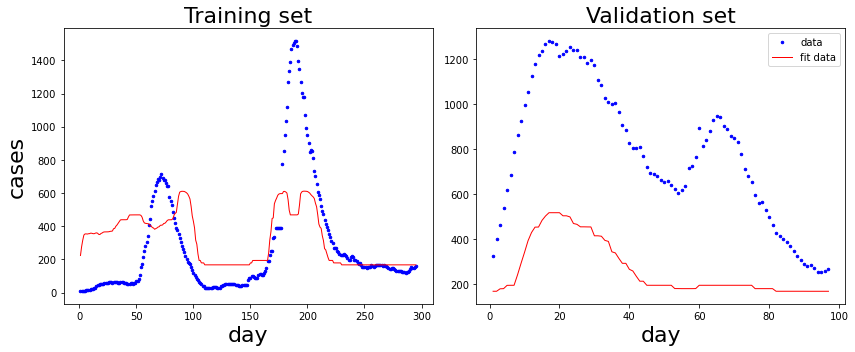

In [119]:
    print(y_predict_test[:])
    plt.figure(figsize=(12, 5))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    ax2.plot(days_test,infectant_ar_test,marker='.',lw=0,c='b',ms=5,label='data')
    ax2.plot(days_test,y_predict_test.T,marker='o',lw=1,ms=0,color='r',label='fit data')
    ax1.plot(days,infectant_ar,marker='.',lw=0,c='b',ms=5,label='data')
    ax1.plot(days,y_predict.T,marker='o',lw=1,ms=0,color='r',label='fit data')
    ax1.set_xlabel('day',fontsize=22)
    ax2.set_xlabel('day',fontsize=22)
    ax1.set_ylabel('cases',fontsize=22)
    ax1.set_title('Training set',fontsize=22)
    ax2.set_title('Validation set',fontsize=22)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [25]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
np.set_printoptions(precision=3, suppress=True)
#tf.enable_eager_execution() 

AttributeError: module 'tensorflow' has no attribute 'enable_eager_execution'

In [4]:
print(tf.__version__)

2.4.1


In [5]:
covid_raw = pd.read_csv('covid_19_data.csv')
region_name = "Hong Kong"
covid = covid_raw.loc[covid_raw['Province/State'] == region_name]
covid.info()
covid.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 12 to 235616
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              403 non-null    int64  
 1   ObservationDate  403 non-null    object 
 2   Province/State   403 non-null    object 
 3   Country/Region   403 non-null    object 
 4   Last Update      403 non-null    object 
 5   Confirmed        403 non-null    float64
 6   Deaths           403 non-null    float64
 7   Recovered        403 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 28.3+ KB


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
12,13,01/22/2020,Hong Kong,Hong Kong,1/22/2020 17:00,0.0,0.0,0.0
50,51,01/23/2020,Hong Kong,Hong Kong,1/23/20 17:00,2.0,0.0,0.0
109,110,01/24/2020,Hong Kong,Hong Kong,1/24/20 17:00,2.0,0.0,0.0
149,150,01/25/2020,Hong Kong,Hong Kong,1/25/20 17:00,5.0,0.0,0.0
192,193,01/26/2020,Hong Kong,Hong Kong,1/26/20 16:00,8.0,0.0,0.0


In [14]:
col_n = ['Confirmed','Deaths','Recovered']
elongday = 5
HK = pd.DataFrame(covid,columns = col_n)
generateCsv(HK,'HK_raw',elongday) # after make the 5 days data, store it 

In [15]:
df = pd.read_csv('HK_raw.csv')
df.head()

,Infected_5_day(s)_ago,Confirmed_5_day(s)_ago,Deaths_5_day(s)_ago,Recovered_5_day(s)_ago,Infected_4_day(s)_ago,Confirmed_4_day(s)_ago,Deaths_4_day(s)_ago,Recovered_4_day(s)_ago,Infected_3_day(s)_ago,Confirmed_3_day(s)_ago,...,Deaths_2_day(s)_ago,Recovered_2_day(s)_ago,Infected_1_day(s)_ago,Confirmed_1_day(s)_ago,Deaths_1_day(s)_ago,Recovered_1_day(s)_ago,Infected,Confirmed,Deaths,Recovered
0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,...,0.0,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0
1,2.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,5.0,5.0,...,0.0,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0
2,2.0,2.0,0.0,0.0,5.0,5.0,0.0,0.0,8.0,8.0,...,0.0,0.0,8.0,8.0,0.0,0.0,10.0,10.0,0.0,0.0
3,5.0,5.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0,8.0,...,0.0,0.0,10.0,10.0,0.0,0.0,10.0,10.0,0.0,0.0
4,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0,8.0,...,0.0,0.0,10.0,10.0,0.0,0.0,12.0,12.0,0.0,0.0


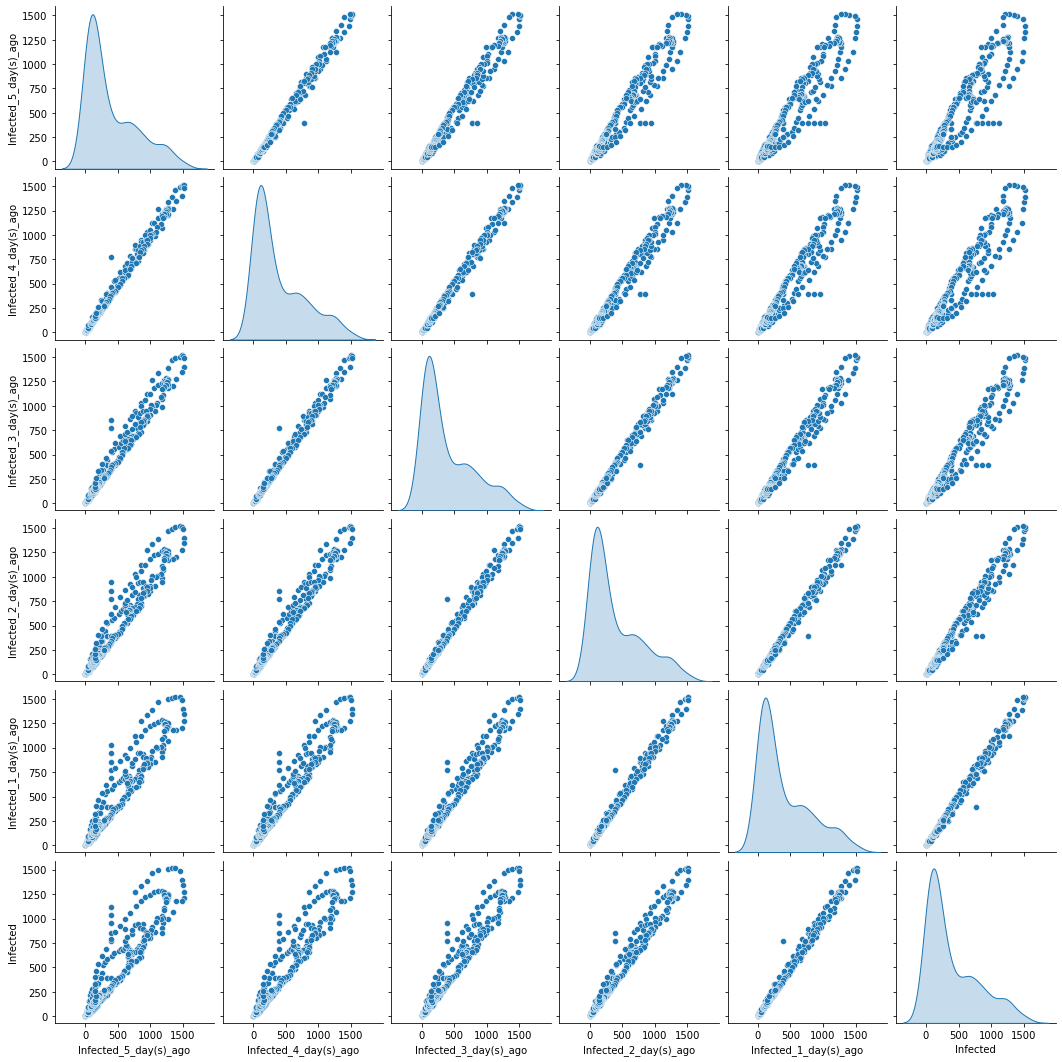

In [16]:
sns.pairplot(df[['Infected_5_day(s)_ago','Infected_4_day(s)_ago', 'Infected_3_day(s)_ago', 'Infected_2_day(s)_ago','Infected_1_day(s)_ago','Infected']], diag_kind='kde')

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Infected_5_day(s)_ago,398.0,400.296482,396.924794,0.0,74.25,217.5,660.75,1517.0
Confirmed_5_day(s)_ago,398.0,3892.223618,3393.918628,0.0,1037.50,3972.5,5454.50,10884.0
Deaths_5_day(s)_ago,398.0,64.138191,63.810515,0.0,4.00,47.0,108.00,197.0
Recovered_5_day(s)_ago,398.0,3427.788945,3142.443433,0.0,849.25,2687.5,5192.25,10404.0
Infected_4_day(s)_ago,398.0,400.979899,396.467735,2.0,78.50,218.5,660.75,1517.0
Confirmed_4_day(s)_ago,398.0,3919.600503,3406.366313,2.0,1039.00,4043.0,5464.00,10896.0
Deaths_4_day(s)_ago,398.0,64.633166,64.075256,0.0,4.00,49.5,108.00,197.0
Recovered_4_day(s)_ago,398.0,3453.987437,3157.224129,0.0,860.25,2801.0,5197.00,10427.0
Infected_3_day(s)_ago,398.0,401.613065,396.029934,2.0,81.25,220.5,660.75,1517.0
Confirmed_3_day(s)_ago,398.0,3947.015075,3418.641853,2.0,1039.00,4113.5,5469.00,10913.0


In [18]:
train_dataset = df.sample(frac=0.8,random_state =20) # seperated the data into training and testing
test_dataset = df.drop(train_dataset.index)

In [19]:
train_dataset.shape
test_dataset.shape

(80, 24)

In [20]:
generateCsv(train_dataset,'Hk_train_dataset') # save the training / testing dataset
generateCsv(test_dataset,'HK_test_dataset')

In [67]:
train_feature = train_dataset.copy()
test_feature = test_dataset.copy()

train_labels = train_feature.pop('Infected') 
test_labels = test_feature.pop('Infected')
train_feature = train_feature.iloc[:,range(elongday*4)]  
test_feature = test_feature.iloc[:,range(elongday*4)] 
print(train_feature.head())
print(train_labels.head())

     Infected_5_day(s)_ago  Confirmed_5_day(s)_ago  Deaths_5_day(s)_ago  \
10                    13.0                    13.0                  0.0   
261                  158.0                  5169.0                105.0   
354                  661.0                  9242.0                158.0   
277                  143.0                  5295.0                105.0   
17                    25.0                    26.0                  1.0   

     Recovered_5_day(s)_ago  Infected_4_day(s)_ago  Confirmed_4_day(s)_ago  \
10                      0.0                   15.0                    15.0   
261                  4906.0                  156.0                  5175.0   
354                  8423.0                  656.0                  9283.0   
277                  5047.0                  148.0                  5303.0   
17                      0.0                   28.0                    29.0   

     Deaths_4_day(s)_ago  Recovered_4_day(s)_ago  Infected_3_day(s)_ago  \
10   

Introduce the normalizer layer fo keras.Sequential

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_feature))

In [26]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

Get the basic value of the nerons network

In [28]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 20)                41        
_________________________________________________________________
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,610
Trainable params: 5,569
Non-trainable params: 41
_________________________________________________________________


Train the dataset, track the history of the training

In [31]:

%%time
history = dnn_model.fit(
    train_feature, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


CPU times: user 1.19 s, sys: 356 ms, total: 1.54 s
Wall time: 1.29 s


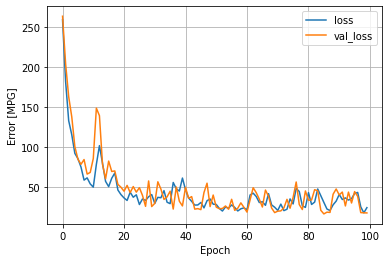

In [34]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

[]

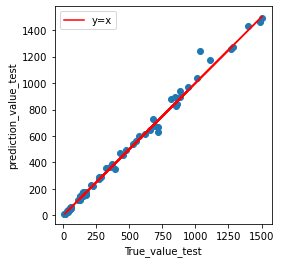

In [39]:
test_predictions = dnn_model.predict(test_feature).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.plot(test_labels, test_labels,'r-',label = 'real = prediction')
plt.xlabel('True_value_test')
plt.ylabel('prediction_value_test')
plt.legend()
plt.plot()

In [54]:
print("MSE = ",dnn_model.evaluate(test_feature, test_labels, verbose=0))
print("R = ",(r2(np.array(test_labels),test_predictions)))

MSE =  18.004924011230468
R =  0.9928154048605787


In [55]:
dnn_model.save('dumb_dnn_model')

INFO:tensorflow:Assets written to: dumb_dnn_model/assets


Trying to use the randomized date for linear regression

In [68]:
X_train = np.array(train_feature)
Y_train = np.array(train_labels)
X_test = np.array(test_feature)
Y_test = np.array(test_labels)
model_r = LinearRegression()
model_r.fit(X_train,Y_train)

LinearRegression()

In [71]:
print(model_r.coef_)

[ 3.249e+09 -3.249e+09  3.249e+09  3.249e+09 -3.347e+09  3.347e+09
 -3.347e+09 -3.347e+09 -1.997e+10  1.997e+10 -1.997e+10 -1.997e+10
 -1.905e+10  1.905e+10 -1.905e+10 -1.905e+10 -2.089e+10  2.089e+10
 -2.089e+10 -2.089e+10]


In [72]:
print(X_test)

[[    5.     5.     0. ...    10.     0.     0.]
 [    8.     8.     0. ...    10.     0.     0.]
 [    8.     8.     0. ...    13.     0.     0.]
 ...
 [  414. 10767.   193. ... 10812.   197. 10270.]
 [  345. 10812.   197. ... 10868.   197. 10389.]
 [  325. 10820.   197. ... 10884.   197. 10404.]]


[  13.247   12.824   16.291   60.358   61.075   63.146   63.833   61.157
   49.516   52.218  684.258  706.545  673.742  644.387  532.122  448.608
   55.184   32.125   40.252   32.21    55.229   57.831   47.477   47.542
   43.584   56.471  128.022  131.837  395.443 1099.678 1527.031 1509.51
 1457.951  797.164  841.729  466.48   359.799  251.605  219.623  214.118
  181.561  151.217  154.842  159.856  156.567  161.351  170.565  166.495
  166.507  165.507  150.667  141.935  144.084  151.377  133.018  130.694
  134.784  132.47   129.895  161.43   150.973  152.652 1272.748 1294.1
 1156.251  979.298  865.412  599.36   645.671  957.491  810.714  881.521
  966.304  671.017  552.393  434.601  381.556  323.812  279.15   286.773]


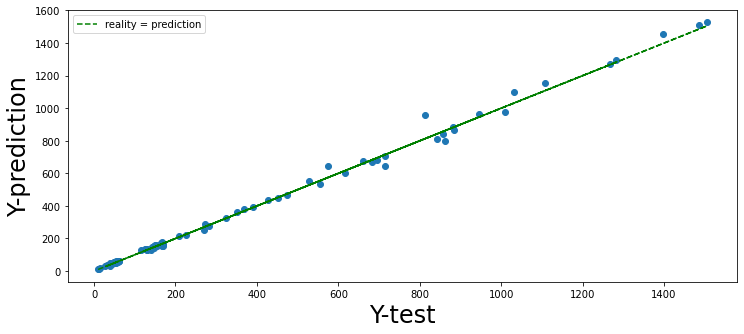

R =  0.9955982998225039


In [81]:
Y_predict = model.predict(X_test)
print(Y_predict)
plt.figure(figsize=(12, 5))
plt.scatter(Y_test,Y_predict)
plt.plot(Y_test,Y_test,'g--',label = "reality = prediction")
plt.xlabel("Y-test",fontsize = 24)
plt.ylabel("Y-prediction",fontsize=24)
plt.legend()
plt.show()
print("R = ",(r2(Y_test,Y_predict)))